# Image processing basics using python with OpenCV

## Prerequisites

Below Python packages are to be downloaded and installed:
1. Python-2.7.x.
2. Numpy
3. Matplotlib (optional)
4. OpenCV

An easy way to install the packages, if you have Python correctly installed and configured, is through the **pip** package manager:

```
> python -m pip install numpy opencv-python matplotlib
```

or

```
$ pip install numpy opencv-python matplotlib
```

## Importing necessary packages

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# check that everything's working correctly
print "cv2:", cv2.__version__
print "np:", np.__version__

cv2: 3.1.0
np: 1.14.0


Obviously, to use the **OpenCV** functions, we just need to call them as: `cv2.functionName()`.

## Reading an image

We use the function **cv2.imread()** to read an image. The image should be in the working directory or a full path of image should be given.

Second argument is a flag which specifies the way image should be read.

* `cv2.IMREAD_COLOR` : Loads a color image. Any transparency of image will be neglected. It is the default flag.
* `cv2.IMREAD_GRAYSCALE` : Loads image in grayscale mode
* `cv2.IMREAD_UNCHANGED` : Loads image as such including alpha channel

See example below:

In [2]:
import numpy as np
import cv2

# Load a color image
img = cv2.imread('harold.jpg')

## Displaying an image

We can use the function **cv2.imshow()** to display an image in a window. The window automatically fits to the image size.

First argument is a window name which is a string, second argument is our image:

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**cv2.waitKey()** is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event.

**cv2.destroyAllWindows()** simply destroys all the windows we created. 

An image can also be diplayed using the **matplotlib** package. If you want to display an RGB image though, a color conversion operation might be necessary (see more details below), as **matplotlib** expects an image in the correct RGB format, while **OpenCV** actually works with BGR:

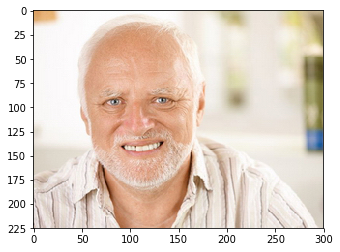

In [4]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ## BGR -> RGB
plt.imshow(img2) 
# or simply: plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

From here on now, we'll be using the **matplotlib** package to display images, as it is more convenient for using in a Jupyter Notebook.

If you want to display an image in a standalone application, it's better to use the standard **OpenCV** function `cv2.imshow`.

## Write an image

Use the function **cv2.imwrite()** to save an image.

First argument is the file name, second argument is the image you want to save.

In [5]:
cv2.imwrite('hidethepain.png',img)

True

## Changing image colour-space

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which are most widely used ones, BGR -> Gray and BGR -> HSV.

For color conversion, we use the function `cv2.cvtColor(input_image, flag)` where flag determines the type of conversion.

For BGR -> Gray conversion we use the flags `cv2.COLOR_BGR2GRAY`. Similarly for BGR -> HSV, we use the flag `cv2.COLOR_BGR2HSV`.

Let's load the image and change the colour space to grayscale:

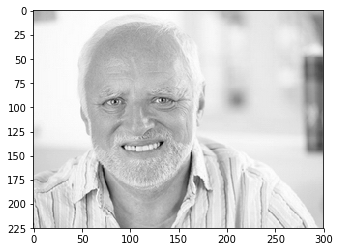

In [6]:
img = cv2.imread('harold.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

Now let's chance the colour space to HSV. The letters in the HSV acronym stand for Hue, Saturation and Value respectively. This colourspace is widely used for colour segmentation and object tracking, because only one channel of the image (hue) actually represents a color, while in the RGB space we need to concern ourselves with all three channels if we want to, for example, find something yellow on the image.

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].

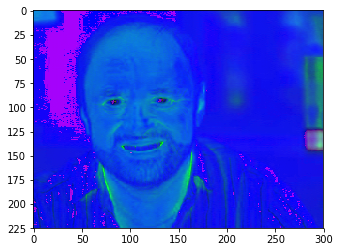

In [7]:
img = cv2.imread('harold.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(hsv, cmap='hsv')
plt.show()

# Basic operations on an image

An image in **OpenCV** is represented as an Numpy array, so most of the basic operations that work with the image are mainly related to Numpy rather than OpenCV.

## Accessing and Modifying pixel values

Let’s load a color image first:

In [8]:
import numpy as np
import cv2

# Load a color image
img = cv2.imread('harold.jpg')

We can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [9]:
px = img[100,100]
print px

[128 162 221]


In [10]:
# accessing only blue pixel
blue = img[100,100,0]
print blue

128


We can modify the pixel values the same way:

In [11]:
img[100,100] = [255,255,255]
print img[100,100]

[255 255 255]


# Accessing Image Properties

Image properties include number of rows, columns and channels, type of image data, number of pixels etc.

Shape of image is accessed by `img.shape`. It returns a tuple of number of rows, columns and channels (if image is color):

In [12]:
print img.shape

(225, 300, 3)


Total number of pixels is accessed by img.size:

In [13]:
print img.size

202500


Image datatype is obtained by `img.dtype`:

In [14]:
print img.dtype

uint8


## Resizing (scaling) an image

Scaling is just resizing of the image. OpenCV comes with a function `cv2.resize()` for this purpose. The size of the image can be specified manually, or we can specify the scaling factor. 

Different interpolation methods are used. Preferable interpolation methods are 1cv2.INTER_AREA1 for shrinking and 1cv2.INTER_CUBIC1 (slow) & 1cv2.INTER_LINEAR1 for zooming. By default, interpolation method used is 1cv2.INTER_LINEAR1 for all resizing purposes. We can resize an input image either of following methods:

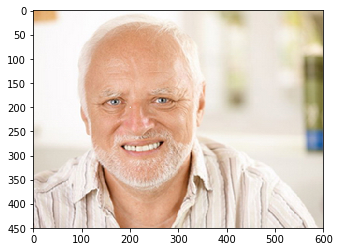

In [15]:
res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.show()

or:

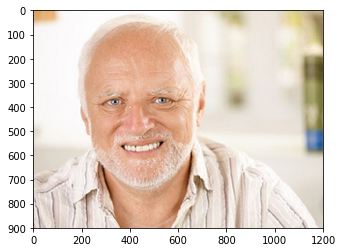

In [16]:
height, width = img.shape[:2]
res2 = cv2.resize(img,(4*width, 4*height), interpolation = cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.show()

## Image rotation

Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form
![equation](https://docs.opencv.org/3.0-beta/_images/math/bd671e57f9f5c4cd5fdd34fbd3244e7e6013354a.png)
To find this transformation matrix, OpenCV provides a function, `cv2.getRotationMatrix2D`. Check below example which rotates the image by 90 degree with respect to center without any scaling.

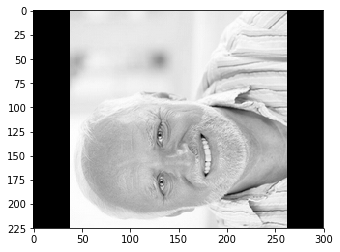

In [17]:
img = cv2.imread('harold.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap='gray')
plt.show()

# Working with a region of an image

Sometimes is might be necessary to work not with the whole image but only with a small region of it. This is useful for editing the image, highlighting certain elements of it or simply cropping a piece of it for later use. These regions are often referred to as **Regions of interest** (ROI).

ROI is again obtained using Numpy indexing. Let's take the previous image an copy Harold's pain-filled eyes and put them on his forehead:

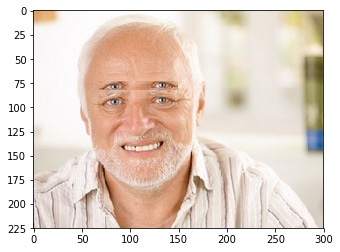

In [18]:
img = cv2.imread('harold.jpg')

pain = img[89:99, 68:150]
img[73:83, 68:150] = pain

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Naturally, we can just crop any region of the image and create a new image out of it:

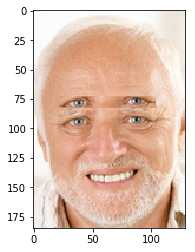

In [19]:
face = img[0:185, 46:175]

plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()

We can just as easily edit any region of interest. For instance, we can fill a rectangular area of the image with one solid colour:

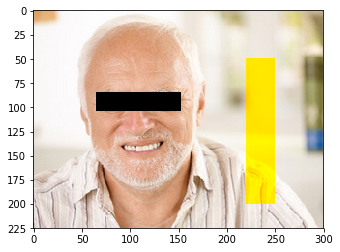

In [20]:
img = cv2.imread('harold.jpg')

img[50:200, 220:250, 2] = 255
img[50:200, 220:250, 0] = 0

img[85:104, 65:153, :] = 0

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Splitting and merging image channels

Sometimes we will need to work separately on B,G,R channels of image. Then we need to split the BGR images to single planes. Or another time, we may need to join these individual channels to BGR image. We can do it simply by:

In [21]:
b,g,r = cv2.split(img)     # splitting channels
img = cv2.merge((b,g,r))   # merging channels

It can also be done using Numpy matrix oterations:

In [22]:
b = img[:,:,0]

For example, let's try to separetely display the three channels of the image, which we converted to the HSV colourspace earlier:

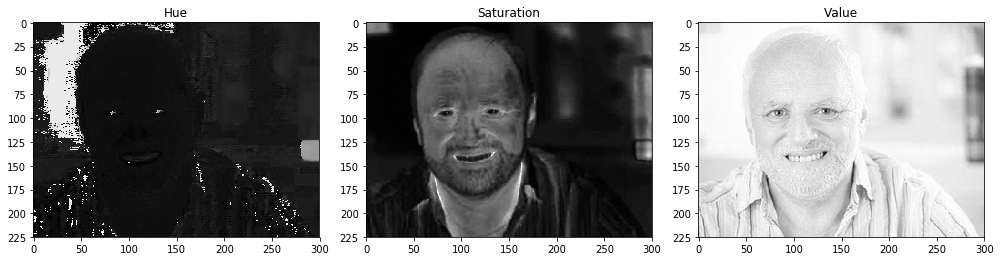

In [23]:
hue,sat,val = cv2.split(hsv)

plt.subplots(figsize=(14, 10))
plt.subplot(131), plt.imshow(hue, cmap='gray'), plt.title('Hue')
plt.subplot(132), plt.imshow(sat, cmap='gray'), plt.title('Saturation')
plt.subplot(133), plt.imshow(val, cmap='gray'), plt.title('Value')
plt.tight_layout()
plt.show()

Suppose, we want to make all the red pixels to zero, we don't need to split the image into channels like this and put it equal to zero. We can simply use Numpy indexing, and that works faster:

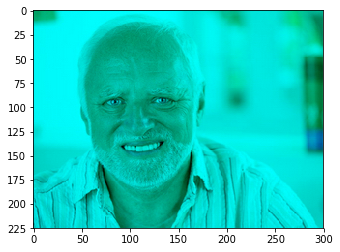

In [24]:
img = cv2.imread('harold.jpg')
img[:,:,2] = 0

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Arithmetic Operations on Images

## Image addition

We can add two images by OpenCV function, `cv2.add()` or simply by numpy operation, `res = img1 + img2`. There is a difference between **OpenCV** addition and **Numpy** addition though. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

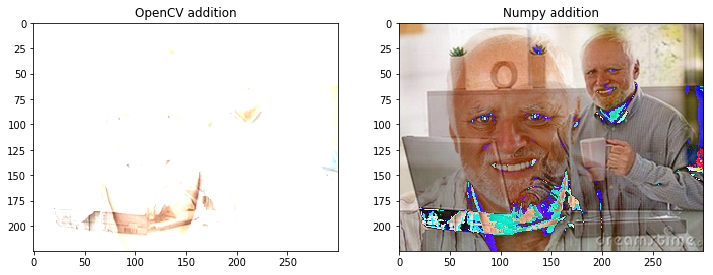

In [25]:
# read two images
img1 = cv2.imread('harold.jpg')
img2 = cv2.imread('harold2.jpg')

# add the images using two methods
res1 = cv2.add(img1, img2)
res2 = img1 + img2

# show the results
plt.subplots(figsize=(12, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)), plt.title("OpenCV addition")
plt.subplot(122), plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)), plt.title("Numpy addition")
plt.show()

## Image subtraction

We can also subtract one image from another. This operation is most often done on grayscale images and shows us the difference between two images.

This operation is widely used in video processing and motion detection to calculate the difference between two consecutive frames or the current frame and a background frame. This leaves us with only the pixels that have changed between two images, highlighting the moving objects.

In this example we show two frames from a security camera feed and calculate their difference by subtracting one from the other:

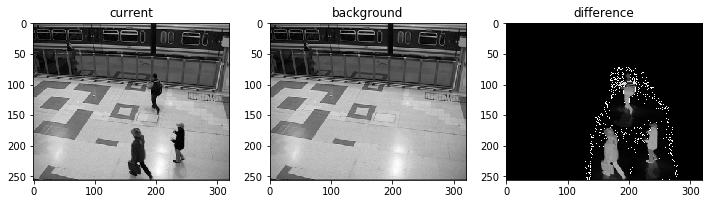

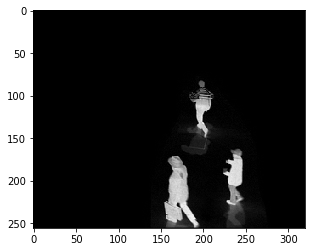

In [26]:
# read two images in grayscale
frame1 = cv2.imread('frame_1.jpg', cv2.IMREAD_GRAYSCALE)
frame2 = cv2.imread('frame_2.jpg', cv2.IMREAD_GRAYSCALE)

# calculate difference
# using numpy matrix operators
diff1 = frame2 - frame1

# using opencv function (absolute difference)
diff2 = cv2.absdiff(frame1, frame2)

# show the results
plt.subplots(figsize=(10, 10))
plt.subplot(131), plt.imshow(frame1, cmap='gray'), plt.title("current")
plt.subplot(132), plt.imshow(frame2, cmap='gray'), plt.title("background")
plt.subplot(133), plt.imshow(diff1, cmap='gray'), plt.title("difference")
plt.tight_layout()
plt.show()

plt.imshow(diff2, cmap='gray')
plt.show()

# Logical (*bitwise*, *binary*) operations on images

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image, defining and working with non-rectangular ROI etc. 

Bitwise operations can be done on any image, but they are more often applied to binary (black & white) images.

Let's create two binary images and perform a few bitwise operations on them:

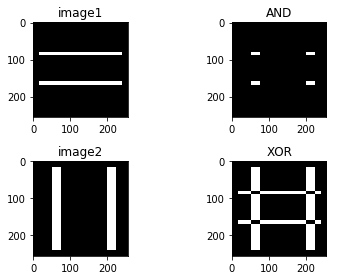

In [27]:
# create two binary images of size 256 x 256
img1 = np.zeros((256, 256), dtype = "uint8")
img2 = np.zeros((256, 256), dtype = "uint8")

# modify the images:
img1[80:90, 16:240] = 255
img1[160:170, 16:240] = 255
img2[16:240, 50:75] = 255
img2[16:240, 200:225] = 255

# perform bitwise operations
resAND = cv2.bitwise_and(img1, img2)
resXOR = cv2.bitwise_xor(img1, img2)

# display
plt.subplot(221), plt.imshow(img1, cmap='gray'), plt.title("image1")
plt.subplot(223), plt.imshow(img2, cmap='gray'), plt.title("image2")
plt.subplot(222), plt.imshow(resAND, cmap='gray'), plt.title("AND")
plt.subplot(224), plt.imshow(resXOR, cmap='gray'), plt.title("XOR")
plt.tight_layout()
plt.show()

# Image thresholding

Thresholding is an operation that is often performed on images in the computer vision field. 

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 

The function used is `cv2.threshold`. First argument is the source image, which **should be a grayscale image**. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 

OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:
* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

Two outputs are obtained. First one is a **retval** which is used in more sophisticated thresholding methods. Second output is our **thresholded** image.

Let's threshold the difference image that we've gotten earlier:

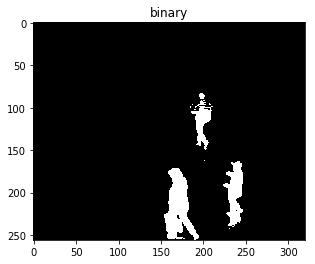

In [28]:
ret,thresh1 = cv2.threshold(diff2, 50, 255, cv2.THRESH_BINARY)

plt.imshow(thresh1, cmap='gray'), plt.title("binary")
plt.show()

## Adaptive thresholding

In the previous example we used a fixed value for the thresholding. Finding the best value, that 'sweet spot', is one of the most difficult problems of image processing. Using one global value may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

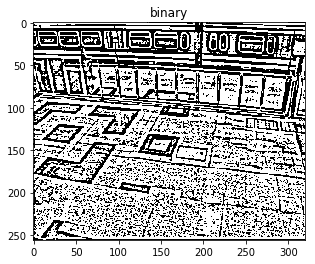

In [29]:
thresh2 = cv2.adaptiveThreshold(frame2,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7,2)
thresh3 = cv2.adaptiveThreshold(frame2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,7,2)

plt.imshow(thresh2, cmap='gray'), plt.title("binary")
plt.show()

## Otsu’s Binarization

Otsu's binarization algorithm is one of the most popular and sophisticated thresholding algorithms, that automatically calculates a threshold value from image histogram for a bimodal image.

For this, the `cv2.threshold()` function is used, by passing an extra flag, `cv2.THRESH_OTSU`. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns us as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value we used.

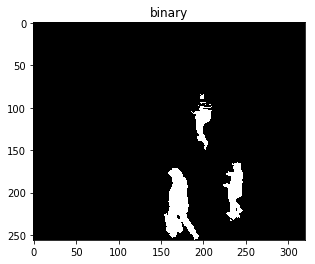

In [30]:
ret2,thresh4 = cv2.threshold(diff2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh4, cmap='gray'), plt.title("binary")
plt.show()

# Morphological operations

Morphological operations are a special kind of image processing techniques based on image shape. that are often used on images, particularly binary images, to enhance them in a certain way.

A morphological operation (also known as Morphological transformation) needs two inputs, one is our **original image**, second one is called **structuring element** or **kernel** which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. There are several other more complex operations, the most known of which are Opening and Closing.

A **kernel** is usually a N x N matrix (where *N* is an odd number) of ones.

## Erosion

The basic idea of erosion is that it "erodes" away the boundaries of foreground object. The kernel slides through the image and for every pixel in the original image (either 1 or 0) it will remain **1** only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

Here's an example of using a 5x5 kernel to erode a binary image:

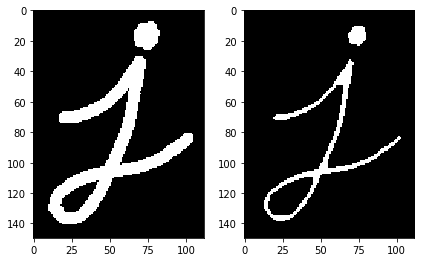

In [31]:
image = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

# create a 5x5 kernel 
kernel = np.ones((5,5),np.uint8)

# perform erosion
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.subplot(122), plt.imshow(erosion, cmap='gray')
plt.tight_layout()
plt.show()

## Dilation

Dilation is the opposite of erosion. Here, a pixel element is set to ‘1’ if at least one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases:

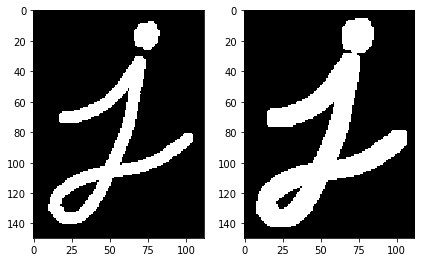

In [32]:
dilation = cv2.dilate(image, kernel, iterations = 1)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.subplot(122), plt.imshow(dilation, cmap='gray')
plt.tight_layout()
plt.show()

## Opening

The Erosion and Dilation operations are rarely used on their own. More often theey are combined, with one following the other.

When an image is first eroded following by its dilation, this is called **opening**. This operation is very useful for removing noise, particularly noise left over after badly done thresholding.

We can use two operations (erosion and dilation) consecutively, but it's more efficient to use the built-in function `cv2.morphologyEx()`:

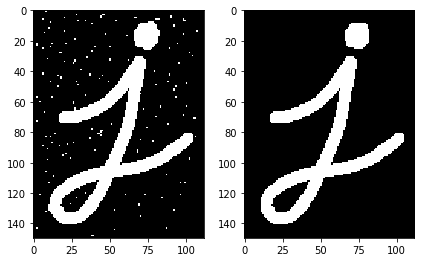

In [33]:
image = cv2.imread('j_1.png', 0)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.subplot(122), plt.imshow(opening, cmap='gray')
plt.tight_layout()
plt.show()

## Closing

**Closing** is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object:

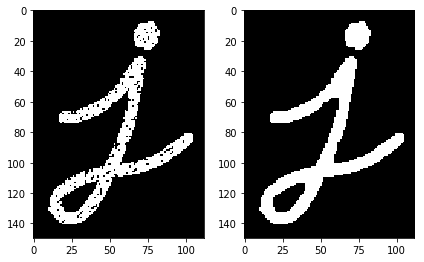

In [34]:
image = cv2.imread('j_2.png', 0)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.tight_layout()
plt.show()

A good example of using morphoolgical closing is dealing with badly done thresholding, when a olid object turned out as a cluster of unconnected blobs:

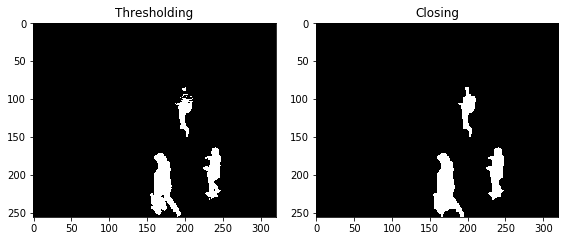

In [35]:
kernel = np.ones((7,7),np.uint8)

fixed = cv2.morphologyEx(thresh4, cv2.MORPH_CLOSE, kernel)

plt.subplots(figsize=(8, 8))
plt.subplot(121), plt.imshow(thresh4, cmap='gray'), plt.title("Thresholding")
plt.subplot(122), plt.imshow(fixed, cmap='gray'), plt.title("Closing")
plt.tight_layout()
plt.show()

# Image filtering

It is ofter necessary to perform image filtering, i.e. process an image in a certain way using a filtering operation.

One of the most important image operators, widely used in *computer vision* and *image processing*, and that is also the basis of image filtering, is the the **2D Convolution**.

Similarly to morphological transformation, 2d concolution is done with a kernel. A kernel will be moved across an image. Every value in the kernel will be multiplied with the corresponding values in the image. The average value of all the products will be placed in the middle 'pixel', over which the kernel was placed:

![](https://prolucid.ca/wp-content/uploads/2014/07/51.png)

OpenCV provides a function `cv2.filter2D()` to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:
![](https://docs.opencv.org/3.0-beta/_images/math/0f363053a6da47e3c45396940386dcdea6c4e2d3.png)

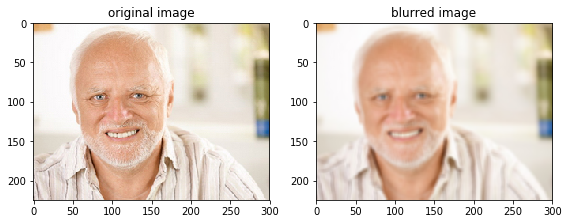

In [36]:
img = cv2.imread('harold.jpg')

# the kernel
kernel = np.ones((5,5),np.float32)/25

# filtering operation
dst = cv2.filter2D(img,-1,kernel)

plt.subplots(figsize=(8, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("original image")
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title("blurred image");
plt.tight_layout()
plt.show()

This is an example of so called 'averaging' filter. This can also be done using a standard function `cv2.blur()`.
Other ways of blurring an image include: a median filter and a Gaussian filter. The former works by taking median of all the pixels under kernel area and repalcing the central element with this median value. The latter uses a Gaussian kernel instead of just a matrix of ones. 

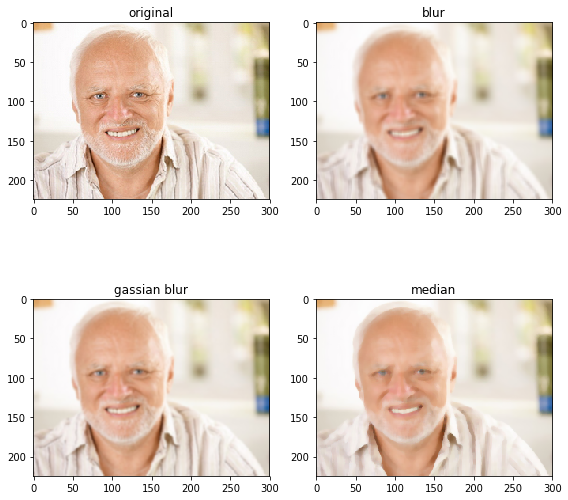

In [ ]:
# Averaging:
blur = cv2.blur(img,(5,5))

# Gaussian blur
gblur = cv2.GaussianBlur(img,(5,5),0)

# Median filter
median = cv2.medianBlur(img,5)

plt.subplots(figsize=(8, 8))
plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("original")
plt.subplot(222), plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)), plt.title("blur");
plt.subplot(223), plt.imshow(cv2.cvtColor(gblur, cv2.COLOR_BGR2RGB)), plt.title("gassian blur");
plt.subplot(224), plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)), plt.title("median");
plt.tight_layout()
plt.show()

# Working with video

## Capture video from a camera

Often, we have to capture live stream with camera. OpenCV provides a very simple interface to this. Let’s capture a video from the camera (we are using the in-built webcam of a laptop), convert it into grayscale video and display it.

To capture a video, we need to create a **VideoCapture** object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected. So we simply pass 0 (or -1). We can select the second camera by passing 1 and so on. After that, we can capture frame-by-frame. But at the end, we need to release the capture:

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if frame is None:
        continue
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Playing Video from file

It is same as capturing from Camera, we just have to change camera index with video file name.

In [ ]:
cap = cv2.VideoCapture('video.mpg')

while(cap.isOpened()):
    ret, frame = cap.read()

    if frame is None:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()